In [1]:
%pip install klib

# Libraries

In [1]:
#Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import klib


from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


from xgboost import XGBRegressor

from sklearn.tree import DecisionTreeRegressor


# Data Preprocessing


In [2]:
# Loading the dataset

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MLop/project1/Demand_dataset.csv')

df.head()

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,0.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0
1,1.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0
2,2.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0
3,3.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0
4,4.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         6480 non-null   float64
 1   date       6480 non-null   object 
 2   city       6480 non-null   object 
 3   lat        6429 non-null   float64
 4   long       6434 non-null   float64
 5   pop        6480 non-null   float64
 6   shop       6480 non-null   object 
 7   brand      6480 non-null   object 
 8   container  6464 non-null   object 
 9   capacity   6465 non-null   object 
 10  price      6480 non-null   float64
 11  quantity   6480 non-null   float64
dtypes: float64(6), object(6)
memory usage: 708.9+ KB


**Handling Missing Values**

In [4]:
# Check for missing values in the dataset

print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
id           1080
date         1080
city         1080
lat          1131
long         1126
pop          1080
shop         1080
brand        1080
container    1096
capacity     1095
price        1080
quantity     1080
dtype: int64


In [5]:
# 1080 data are missing, and the filling is not accurate, so deleting that columns is a better option.

df = df.dropna(subset=['id'])

In [6]:
df.isnull().sum()

,0
id,0
date,0
city,0
lat,51
long,46
pop,0
shop,0
brand,0
container,16
capacity,15


In [7]:
# Checking for Duplicate Values

duplicates_count = df.duplicated().sum()
print("Duplicate Values:", duplicates_count)

Duplicate Values: 0


In [8]:
null_columns = df.columns[df.isnull().any()]
print("Columns with nulls:", null_columns.tolist())


Columns with nulls: ['lat', 'long', 'container', 'capacity']


In [9]:
#Filling

for column in df.columns:
    if df[column].isnull().sum()>0:
        if df[column].dtype=='object':
            df[column].fillna(df[column].mode()[0], inplace=True)
        else:
            df[column].fillna(df[column].mean(), inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6480 entries, 0 to 6479
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         6480 non-null   float64
 1   date       6480 non-null   object 
 2   city       6480 non-null   object 
 3   lat        6480 non-null   float64
 4   long       6480 non-null   float64
 5   pop        6480 non-null   float64
 6   shop       6480 non-null   object 
 7   brand      6480 non-null   object 
 8   container  6480 non-null   object 
 9   capacity   6480 non-null   object 
 10  price      6480 non-null   float64
 11  quantity   6480 non-null   float64
dtypes: float64(6), object(6)
memory usage: 658.1+ KB


<ipython-input-9-f8a421c45f1e>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
<ipython-input-9-f8a421c45f1e>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

**Data Manipulation**

In [10]:
# Select categorical columns
categorical_col = df.select_dtypes(include=['object', 'category']).columns

cardinality = df[categorical_col].nunique()

print(cardinality)

date         72
city          5
shop          6
brand         5
container     3
capacity      3
dtype: int64


In [11]:
#date -> int/float
df['date']= pd.to_datetime(df['date'], errors='coerce')

df['date Year'] = df['date'].dt.year
df['date Month'] = df['date'].dt.month
df['date Day'] = df['date'].dt.day

df.drop(columns=['date'], inplace=True)

<ipython-input-11-2a939f8fb81a>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date']= pd.to_datetime(df['date'], errors='coerce')


In [12]:
df['city'].value_counts()


,count
city,
Athens,2160
Irakleion,1080
Patra,1080
Thessaloniki,1080
Larisa,1080


In [13]:
df['shop'].value_counts()

,count
shop,
shop_1,1080
shop_2,1080
shop_6,1080
shop_4,1080
shop_3,1080
shop_5,1080


In [14]:
df['shop'] = df['shop'].str.extract('(\d+)').astype(int)


In [15]:
df['brand'].value_counts()

,count
brand,
kinder-cola,1296
adult-cola,1296
orange-power,1296
gazoza,1296
lemon-boost,1296


In [16]:
df['container'].value_counts()

,count
container,
plastic,2173
glass,2154
can,2153


In [17]:
df['capacity'].value_counts()

,count
capacity,
1.5lt,2172
330ml,2156
500ml,2152


In [18]:
def convert_to_numeric(value):
    if 'ml' in value:
        return float(value.replace('ml', '')) / 1000
    elif 'lt' in value:
        return float(value.replace('lt', ''))
    return None

df['capacity'] = df['capacity'].apply(convert_to_numeric)


In [19]:
df.head(20)

,id,city,lat,long,pop,shop,brand,container,capacity,price,quantity,date Year,date Month,date Day
0,0.0,Athens,37.97945,23.71622,672130.0,1,kinder-cola,glass,0.50,0.96,13280.0,2012,1,31
1,1.0,Athens,37.97945,23.71622,672130.0,1,kinder-cola,plastic,1.50,2.86,6727.0,2012,1,31
2,2.0,Athens,37.97945,23.71622,672130.0,1,kinder-cola,can,0.33,0.87,9848.0,2012,1,31
3,3.0,Athens,37.97945,23.71622,672130.0,1,adult-cola,glass,0.50,1.00,20050.0,2012,1,31
4,4.0,Athens,37.97945,23.71622,672130.0,1,adult-cola,can,0.33,0.39,25696.0,2012,1,31
5,5.0,Athens,37.97945,23.71622,672130.0,1,orange-power,glass,0.50,1.00,15041.0,2012,1,31
6,6.0,Athens,37.97945,23.71622,672130.0,1,orange-power,can,0.33,0.43,34578.0,2012,1,31
7,7.0,Athens,37.97945,23.71622,672130.0,1,gazoza,glass,0.50,0.49,44734.0,2012,1,31
8,8.0,Athens,37.97945,23.71622,672130.0,1,lemon-boost,glass,0.50,0.70,18623.0,2012,1,31
9,9.0,Athens,37.97945,23.71622,672130.0,1,lemon-boost,plastic,1.50,2.21,9645.0,2012,1,31


In [20]:
# Select categorical columns
categorical_col = df.select_dtypes(include=['object', 'category']).columns

cardinality = df[categorical_col].nunique()

print(cardinality)

city         5
brand        5
container    3
dtype: int64


In [21]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Loop over each categorical column
for col in categorical_col:
    if cardinality[col] < 5:
        # One-hot encode columns with low cardinality
        dummies = pd.get_dummies(df[col], prefix=col, drop_first=False)
        dummies = dummies.astype(int)
        df = pd.concat([df.drop(columns=[col]), dummies], axis=1)
    else:
        # Label encode columns with high cardinality
        df[col] = label_encoder.fit_transform(df[col])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6480 entries, 0 to 6479
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 6480 non-null   float64
 1   city               6480 non-null   int64  
 2   lat                6480 non-null   float64
 3   long               6480 non-null   float64
 4   pop                6480 non-null   float64
 5   shop               6480 non-null   int64  
 6   brand              6480 non-null   int64  
 7   capacity           6480 non-null   float64
 8   price              6480 non-null   float64
 9   quantity           6480 non-null   float64
 10  date Year          6480 non-null   int32  
 11  date Month         6480 non-null   int32  
 12  date Day           6480 non-null   int32  
 13  container_can      6480 non-null   int64  
 14  container_glass    6480 non-null   int64  
 15  container_plastic  6480 non-null   int64  
dtypes: float64(7), int32(3), int6

In [23]:
df = klib.data_cleaning(df)


df.info()

Shape of cleaned data: (6480, 16) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.74 MB (-72.55%)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6480 entries, 0 to 6479
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 6480 non-null   float32
 1   city               6480 non-null   int8   
 2   lat                6480 non-null   float32
 3   long               6480 non-null   float32
 4   pop                6480 non-null   float32
 5   shop               6480 non-null   int8   
 6   brand              6480 non-null   int8   
 7   capacity           6480 non-null   float32
 8   price              6480 non-null   float32
 9   quantity           6480 non-null   float32
 10  date_year          6480 non-null   int32  
 

# EDA

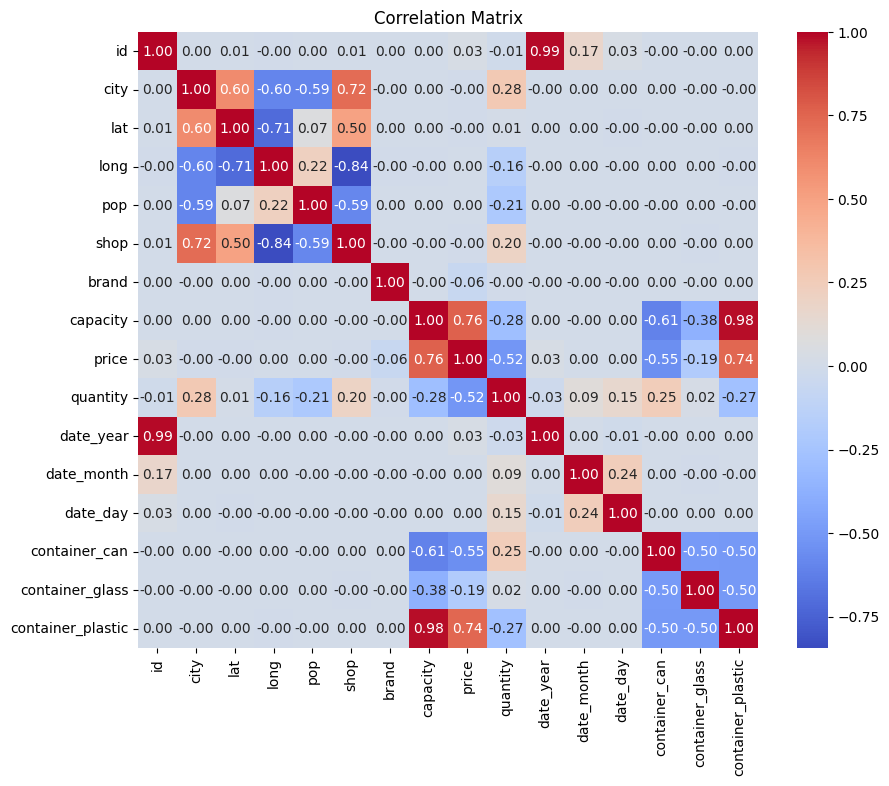

In [24]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

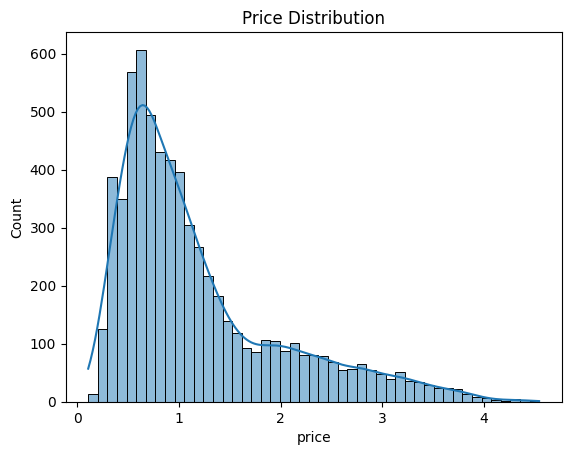

In [25]:
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.show()


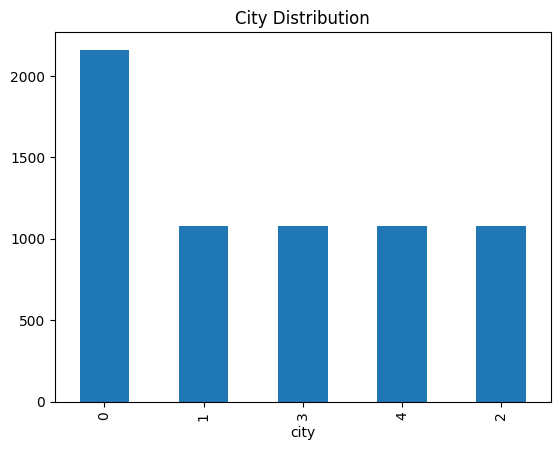

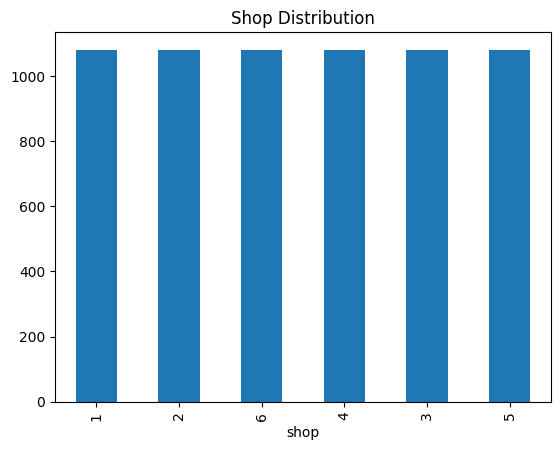

In [26]:
df['city'].value_counts().plot(kind='bar')
plt.title('City Distribution')
plt.show()

df['shop'].value_counts().plot(kind='bar')
plt.title('Shop Distribution')
plt.show()


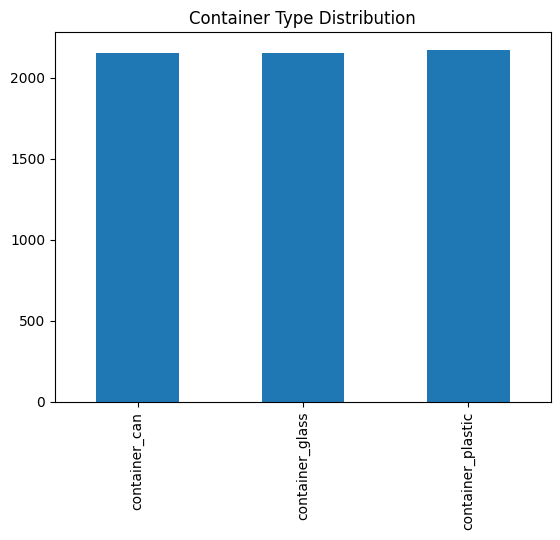

In [27]:
df[['container_can', 'container_glass', 'container_plastic']].sum().plot(kind='bar')
plt.title('Container Type Distribution')
plt.show()


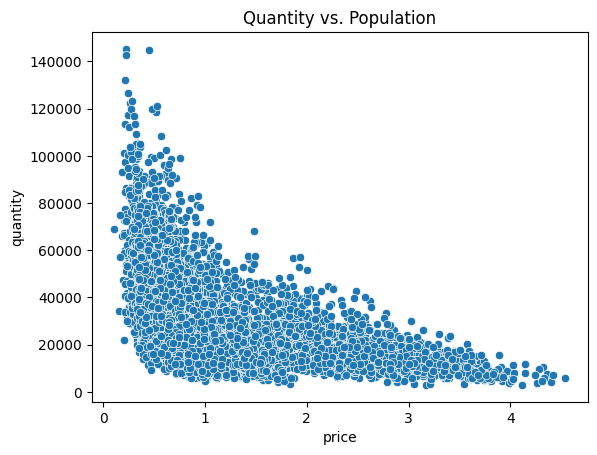

In [28]:
sns.scatterplot(x=df['price'], y=df['quantity'])
plt.title('Quantity vs. Population')
plt.show()


# Model Training

In [29]:
# Features (X) and target (y)
X = df.drop('quantity', axis=1)
y = df['quantity']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Scale the features (important for many models, especially when features have different scales)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

***Decision Tree***

In [31]:
model_dt = DecisionTreeRegressor(random_state=42)

In [32]:
model_dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [33]:
y_pred = model_dt.predict(X_test_scaled)

In [34]:
mse_dt = mean_squared_error(y_test, y_pred)
r2_dt = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse_dt:.2f}')
print(f'Squared Error: {r2_dt:.2f}')

Mean Squared Error: 51781421.08
Squared Error: 0.85


In [35]:
cv_scores = cross_val_score(model_dt, X, y, cv=5)  # cv=5 means 5-fold cross-validation
avg_cv_scores=np.mean(cv_scores)

avg_cv_scores

np.float64(0.8214979274392092)

In [36]:
param_grid={
    "max_depth": [None, 2, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": [None, 'auto', 'sqrt', 'log2']
}

In [37]:
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error' )
grid_search.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 2, 5, 10],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [38]:
best_params = grid_search.best_params_
print(best_params)

{'max_depth': None, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [39]:
y_pred_tune = grid_search.best_estimator_.predict(X_test_scaled)

mse_dt_tune = mean_squared_error(y_test, y_pred_tune)
r2_dt_tune = r2_score(y_test, y_pred_tune)

print(f'Mean Squared Error: {mse_dt_tune:.2f}')
print(f'Squared Error: {r2_dt_tune:.2f}')

Mean Squared Error: 48133425.43
Squared Error: 0.86


***XGB***


In [40]:
# Initialize the XGBRegressor
xgb_regressor = XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
xgb_regressor.fit(X_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [41]:
# Predict on the test set
y_pred = xgb_regressor.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred)
r2_xgb = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse_xgb}')
print(f'R-squared: {r2_xgb}')

Mean Squared Error (MSE): 15557961.0
R-squared: 0.9538723230361938


In [42]:
# Define a parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize XGBRegressor
xgb_regressor = XGBRegressor(objective='reg:squarederror', random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(xgb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best hyperparameters
print(f'Best hyperparameters: {grid_search.best_params_}')

# Evaluate the best model
best_xgb_regressor = grid_search.best_estimator_
y_pred_best = best_xgb_regressor.predict(X_test)

# Calculate MSE and R-squared
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Mean Squared Error after tuning: {mse_best}')
print(f'R-squared after tuning: {r2_best}')

Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Mean Squared Error after tuning: 12242851.0
R-squared after tuning: 0.9637013077735901


Text(0.5, 1.0, 'Model Performance Comparison (MSE)')

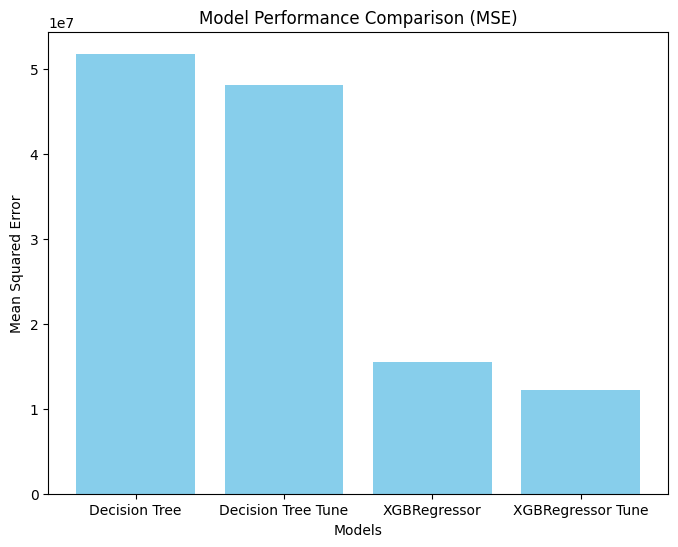

In [43]:
models = ['Decision Tree', 'Decision Tree Tune', 'XGBRegressor', 'XGBRegressor Tune']
mse_scores = [mse_dt, mse_dt_tune, mse_xgb, mse_best]  # Mean Squared Errors for each model

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, mse_scores, color='skyblue')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Model Performance Comparison (MSE)')


Text(0.5, 1.0, 'Model Performance Comparison (R2)')

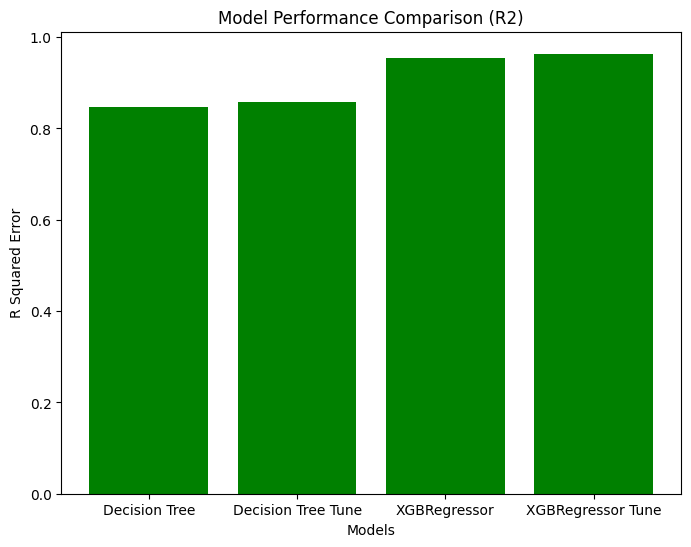

In [44]:
models = ['Decision Tree', 'Decision Tree Tune', 'XGBRegressor', 'XGBRegressor Tune']
r2_scores = [r2_dt, r2_dt_tune, r2_xgb, r2_best]  # Mean Squared Errors for each model

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, r2_scores, color='green')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('R Squared Error')
plt.title('Model Performance Comparison (R2)')

# Model upload/download

In [45]:
import joblib

In [46]:
joblib.dump(best_xgb_regressor, 'xgb_model.joblib')

['xgb_model.joblib']

In [47]:
from google.colab import files
# Download the saved model to local machine
files.download('xgb_model.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>